In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

mnist = keras.datasets.mnist
(x_train_full, y_train_full),(x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


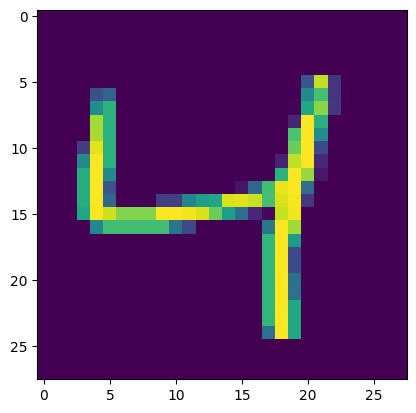

In [ ]:
plt.imshow(x_train_full[2])

In [ ]:
x_train_norm = x_train_full/255.
x_test_norm = x_test/255.

x_valid, x_train = x_train_norm[:5000], x_train_norm[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

x_test = x_test_norm


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)


In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])


In [ ]:
model_history = model.fit(x_train,y_train,epochs=30,validation_data=(x_valid,y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.7333 - loss: 1.0296 - val_accuracy: 0.9154 - val_loss: 0.3062
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9119 - loss: 0.3098 - val_accuracy: 0.9316 - val_loss: 0.2404
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9279 - loss: 0.2495 - val_accuracy: 0.9412 - val_loss: 0.2050
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9384 - loss: 0.2126 - val_accuracy: 0.9492 - val_loss: 0.1804
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9470 - loss: 0.1853 - val_accuracy: 0.9560 - val_loss: 0.1620
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9526 - loss: 0.1639 - val_accuracy: 0.9602 - val_loss: 0.1473
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9580 - loss: 0.1464 - val_accuracy: 0.9650 - val_loss: 0.1358
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9622 - loss: 0.1320 - 

In [ ]:
x_sample = x_test[:5]
y_probability = model.predict(x_sample)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
